# Salesforce Data Analysis – Internship Selection Project
### Candidate: Breno Montenegro
### Last Updated: December 12, 2025 (UTC)
---

## 1. Project Overview
This notebook was developed as part of the selection process for a data internship position.  
The goal is to analyze anonymized Salesforce datasets, perform exploratory analysis, derive insights, and demonstrate analytical thinking, data manipulation skills, and communication clarity.

---

## 2. Datasets Used
Two anonymized datasets were provided:

### **a) Accounts Dataset (`accounts_anonymized.json`)**
Contains information about customer accounts, including:
- Account ID
- Country
- Industry sector
- Account creation date
- Account anonymized name

### **b) Support Cases Dataset (`support_cases_anonymized.json`)**
Contains support tickets registered by customers, with fields such as:
- Case ID
- Linked Account ID
- Product involved
- Case status and severity
- Category, type, and reason
- Creation and closure dates

These datasets can be joined via the field **`account_sfid`**, enabling customer-level aggregated analysis.

---

## 3. Objectives
- Load and inspect both datasets  
- Merge datasets when appropriate (Accounts × Support Cases)  
- Perform exploratory data analysis (EDA)  
- Identify trends in support requests, industries served, and customer distribution  
- Highlight patterns in case status, severity, and product usage  
- Generate visualizations to support insights  
- Summarize findings and potential business implications

---

## 4. Tools and Environment
This notebook runs on **Google Colab** using:
- Python
- Pandas  
- NumPy  
- Matplotlib / Seaborn / Plotly  
- Scikit-learn for preprocessing or clustering
- SQLite  

---

## 5. Notebook Structure
1. Importing libraries  
2. Loading datasets  
3. Dataset inspection and cleaning  
4. Exploratory Data Analysis (EDA)  
5. SQL Processing and KPI Aggregation
6. Visualizations  
7. Business Insights  
8. Recommendations
9. Conclusions
---

> *This structure ensures clarity, reproducibility, and alignment with industry standards for data analysis workflows.*

> ## 1. Importing Libraries

The following libraries will be used throughout the analysis for data manipulation, visualization, and exploratory analysis. Additional libraries may be included later as needed.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

print("Libraries imported successfully.")

Libraries imported successfully.


> ## 2. Loading the Data

In this section, both anonymized Salesforce datasets are loaded into Pandas DataFrames.  
The files include account-level information and support case records, which will be explored and analyzed throughout the project.

The datasets are provided in JSON format and can be read directly using "pd.read_json()".


In [2]:
uploaded = files.upload()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

sns.set(style="whitegrid")

Saving accounts_anonymized.json to accounts_anonymized.json
Saving support_cases_anonymized.json to support_cases_anonymized.json


In [3]:
accounts_df = pd.read_json("accounts_anonymized.json")
cases_df = pd.read_json("support_cases_anonymized.json")

In [4]:
print("Accounts dataset shape:", accounts_df.shape)
print("Support cases dataset shape:", cases_df.shape)

accounts_df.head()
cases_df.head()

Accounts dataset shape: (1415, 5)
Support cases dataset shape: (10000, 16)


,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None


> ## 3. Dataset Inspection and Initial Cleaning

In this section, we perform an initial inspection of both datasets, checking their structure, data types, missing values, and general consistency.  
This step ensures the datasets are ready for proper exploratory data analysis (EDA) and prevents unexpected issues during the analysis workflow.


### 3.1 General View

In [5]:
print("Accounts DataFrame:")
display(accounts_df.head())

print("\nSupport Cases DataFrame:")
display(cases_df.head())

Accounts DataFrame:


,account_sfid,account_name,account_created_date,account_country,account_industry
0,28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6...,Customer_b9c711e0,2017-12-18 15:53:15,Pakistan,Printing
1,17779701277914218bcfcd9211c3fb6673758ca2f6e014...,Customer_b3e69ecd,2010-01-11 17:41:46,United Kingdom,Household & Personal Products
2,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,2020-10-19 17:12:22,China,Packaging and Containers
3,e7b6a33c931f01e1e2d42b47318945216da6fef294a738...,Customer_58de6751,2019-03-20 12:56:09,South Korea,Pharmaceuticals
4,fbcec0b147243cfce96df94fe543968c04cfc0a4a29fd7...,Customer_97f3101d,2021-03-24 14:06:24,Poland,Printing



Support Cases DataFrame:


,case_sfid,account_sfid,case_number,case_contact_name,case_product,case_status,case_resolution,case_details,case_closure,case_priority,case_severity,case_reason,case_type,case_category,case_created_date,case_closed_date
0,c9f05bc582a8abec4c5f1a9385c24a96d86d3f3093c557...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69908,Contact_e2737240,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
1,a8f7c39a437d713e800599205d6cd9319733fd5df18af8...,3675a0565672bccecbba8a8a102b0482f3c82e6f07443e...,69887,Contact_20439d47,GVD Perpetual,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
2,654dd0c826e0842cdd030e935aa1e886787cb990b693c2...,58912bf7e5131400adbc1c1521158b7b8cc2f2f3fbd51f...,69910,Contact_edf7784e,Verify Enterprise,Closed,Done,Trial,Undefined,Normal,Low,Other,License Activation,Licensing,2025-01-09,2025-01-09
3,57422ac55031dd6c7acf36a2bc6d74e01e0c0194c61318...,908d42c9a4e3f4beae8bf394dd2ed82090a219cdf64518...,69905,Contact_6f59abbf,Verify,Closed,Done,Full,Undefined,Normal,Medium,Other,License Activation,Licensing,2025-01-09,2025-01-09
4,b88c12d55a7c468c96e48a7693e306e24f44947f5f1e3f...,None,69891,Contact_f02dfb7d,Other,New,Undefined,Undefined,Undefined,Normal,Undefined,Other,Undefined,Undefined,2025-01-09,None


### 3.2 Data structure (columns and types)

In [6]:
print("Accounts info:")
accounts_df.info()

print("\nSupport Cases info:")
cases_df.info()

Accounts info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_sfid          1415 non-null   object
 1   account_name          1415 non-null   object
 2   account_created_date  1415 non-null   object
 3   account_country       1408 non-null   object
 4   account_industry      1402 non-null   object
dtypes: object(5)
memory usage: 55.4+ KB

Support Cases info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case_sfid          10000 non-null  object
 1   account_sfid       8407 non-null   object
 2   case_number        10000 non-null  int64 
 3   case_contact_name  10000 non-null  object
 4   case_product       10000 non-null  object
 5   case_status        10000 

### 3.3 Null Values verification

In [7]:
print("Missing values in Accounts dataset:")
print(accounts_df.isnull().sum())

print("\nMissing values in Support Cases dataset:")
print(cases_df.isnull().sum())

Missing values in Accounts dataset:
account_sfid             0
account_name             0
account_created_date     0
account_country          7
account_industry        13
dtype: int64

Missing values in Support Cases dataset:
case_sfid               0
account_sfid         1593
case_number             0
case_contact_name       0
case_product            0
case_status             0
case_resolution         0
case_details            0
case_closure            0
case_priority           0
case_severity           0
case_reason             0
case_type               0
case_category           0
case_created_date       0
case_closed_date      942
dtype: int64


### 3.4 Standardizing Column Names

Standardizing column names is an important step to ensure consistency across the datasets.  
By converting all column names to a uniform format (such as lowercase), we avoid issues caused by case sensitivity, improve code readability, and make future data manipulation more reliable and less error-prone.

In [8]:
accounts_df.columns = accounts_df.columns.str.lower()
cases_df.columns = cases_df.columns.str.lower()

Standardizing column names ensures consistency across Python and SQL operations.


### 3.5 Converting Date Columns

Converting date columns into proper datetime formats is essential for accurate analysis.  
This step ensures that operations such as filtering, sorting, computing time differences, and extracting components (year, month, day) work correctly.  
It also prevents inconsistencies that may arise when dates are stored as strings instead of structured datetime objects.

In [9]:
date_cols_accounts = ["account_created_date"]
date_cols_cases = ["case_created_date", "case_closed_date"]

for col in date_cols_accounts:
    if col in accounts_df.columns:
        accounts_df[col] = pd.to_datetime(accounts_df[col], errors="coerce")

for col in date_cols_cases:
    if col in cases_df.columns:
        cases_df[col] = pd.to_datetime(cases_df[col], errors="coerce")

> ## 4. Exploratory Data Analysis (EDA)

This section performs an exploratory analysis of the Accounts and Support Cases datasets.  
The goal is to understand the structure, distribution, relationships, and potential issues within the data before moving into SQL-based processing.

The EDA focuses on:
- Summary statistics
- Distributions of key fields
- Categorical value frequencies
- Relationships between account and case fields
- Identifying potential patterns or anomalies

### 4.1. Summary Statistics (numeric columns)

In [10]:
print("Accounts dataset — summary statistics:")
display(accounts_df.describe())

print("\nSupport Cases dataset — summary statistics:")
display(cases_df.describe())

Accounts dataset — summary statistics:


,account_created_date
count,1415
mean,2018-01-22 11:35:08.946289920
min,2007-11-19 21:27:02
25%,2014-03-18 05:07:12.500000
50%,2019-03-28 13:49:20
75%,2022-12-31 07:58:28.500000
max,2025-01-06 10:46:57



Support Cases dataset — summary statistics:


,case_number,case_created_date,case_closed_date
count,10000.000000,10000,9058
mean,64884.845700,2024-06-23 13:05:13.920000,2024-06-22 09:22:36.855817984
min,59745.000000,2023-11-22 00:00:00,2023-11-22 00:00:00
25%,62388.750000,2024-03-15 00:00:00,2024-03-13 00:00:00
50%,64890.500000,2024-06-26 00:00:00,2024-06-26 00:00:00
75%,67406.250000,2024-10-01 00:00:00,2024-09-30 00:00:00
max,69911.000000,2025-01-09 00:00:00,2025-01-09 00:00:00
std,2914.373454,NaN,NaN


### 4.2. Categorical Column Exploration

In [11]:
accounts_cat = accounts_df.select_dtypes(include=['object']).columns
cases_cat = cases_df.select_dtypes(include=['object']).columns

print("Accounts categorical columns:", accounts_cat)
print("Support Cases categorical columns:", cases_cat)

Accounts categorical columns: Index(['account_sfid', 'account_name', 'account_country', 'account_industry'], dtype='object')
Support Cases categorical columns: Index(['case_sfid', 'account_sfid', 'case_contact_name', 'case_product',
       'case_status', 'case_resolution', 'case_details', 'case_closure',
       'case_priority', 'case_severity', 'case_reason', 'case_type',
       'case_category'],
      dtype='object')


In [12]:
for col in accounts_cat:
    print(f"\nValue counts for {col} (Accounts):")
    print(accounts_df[col].value_counts().head(10))


Value counts for account_sfid (Accounts):
account_sfid
1f6e4aeb836642a07eea6bb5da7ccb3dd5023c23f2ad3c631cf3c89d59dc6fc2    1
28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6f51fa34295dfc7c6c5    1
17779701277914218bcfcd9211c3fb6673758ca2f6e014296b5d535613dc253d    1
777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1a07cbb77979d878215    1
e7b6a33c931f01e1e2d42b47318945216da6fef294a73864f2bc24687c591ab3    1
fbcec0b147243cfce96df94fe543968c04cfc0a4a29fd7c1376446439950cff3    1
e41ca56b8a610e7459d606cc7df4e4c87eb2e6bce20757841873435b8787c8b1    1
9a740fd3eb20841a3376ccc318984706dabcb2774ff1118410a1b417851da58a    1
f038b083ed940f9305ddab96f1879c6b28decf45eae5f539d245079c5ca7ff70    1
9cb38e796505b310200aefd19b9a74574878b8578eadf880d7b6e36cf797d8e8    1
Name: count, dtype: int64

Value counts for account_name (Accounts):
account_name
Customer_71f8fa02    2
Customer_95c0c4a0    1
Customer_6ba8bdf5    1
Customer_18dc2077    1
Customer_1dba36ab    1
Customer_b217a548    1
Customer_89763bba    1
C

In [13]:
for col in cases_cat:
    print(f"\nValue counts for {col} (Support Cases):")
    print(cases_df[col].value_counts().head(10))


Value counts for case_sfid (Support Cases):
case_sfid
d1a1ceae99d05f08e05ba74768d9bc181098b4db615c9d84cf14f586b9d51a5c    1
b1e4cb2c20b7a24c94c831f8a5ac4486e5ebdfd078f2a022a1b6132f69dc4489    1
8b8e906b98761b6114b5545eb9747d2ffd2f517ed8db3c5a27fd49732af150a9    1
a7395fb2c028e931922bae1be56312d70258f527b29f05fc47e97c98a0d2b044    1
6d18467e0d12ed13ee5bb19223a2a39e9b95288e95299d87692a773f9391ecb3    1
5d83b5ebd1cd3c580c19eb08cc11710ae028fca657f25df049539468c9f34e41    1
b0109c2ba4c4d7821857f9afc2da306190425ad8b00897204ff10a0b5176bcf8    1
3389b0ac5a3572c46853aab3e86fea0f59ef7de3094b36583ed1409bd541418e    1
d121807ccf0d1da951342efd2b1290eb2cd3acb39c257f97455704a66c08199c    1
d05d34468ce7008ebb48fa4274dc4f4f67c29443134938d8a9ca173288b19afa    1
Name: count, dtype: int64

Value counts for account_sfid (Support Cases):
account_sfid
87b5772b6964f23ef7db8085e8f91c41937979575f8afdfa63b4b1c3948e4fce    1650
0e45934f296ca9a462fb43e3d47246ced1379555d4eb3e362193b30d7f56058e     226
a6b6a3deac72

### 4.3. Missing Values Visualization (heatmap)

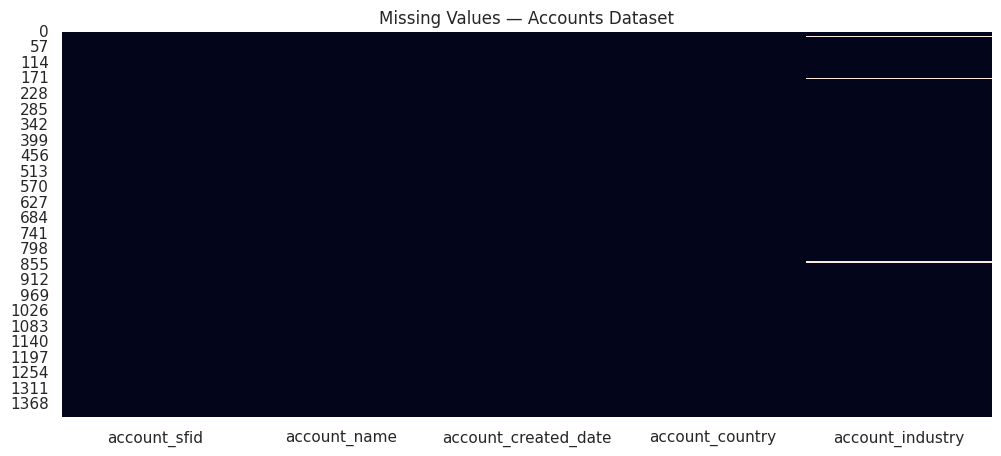

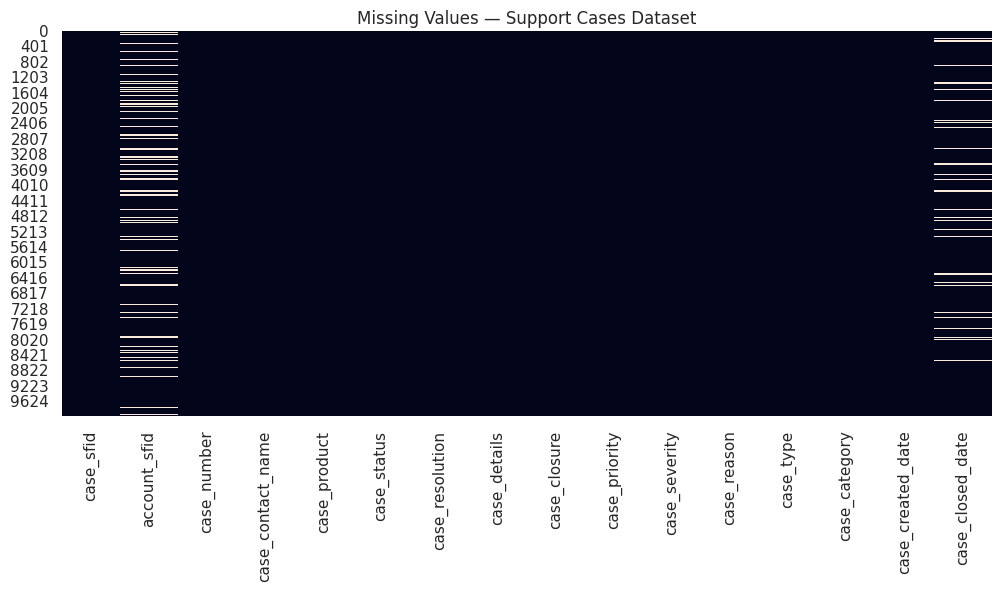

In [14]:
plt.figure(figsize=(12, 5))
sns.heatmap(accounts_df.isnull(), cbar=False)
plt.title("Missing Values — Accounts Dataset")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(cases_df.isnull(), cbar=False)
plt.title("Missing Values — Support Cases Dataset")
plt.show()

### 4.4. Case Status Distribution

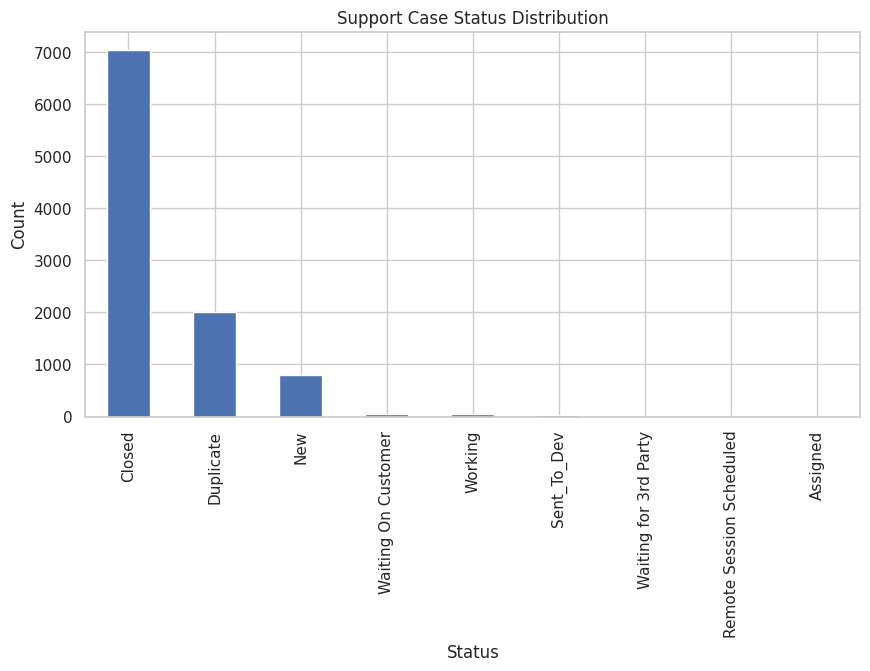

In [16]:
plt.figure(figsize=(10,5))
cases_df["case_status"].value_counts().plot(kind='bar')
plt.title("Support Case Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

### 4.5. Cases Over Time (Creation Date)

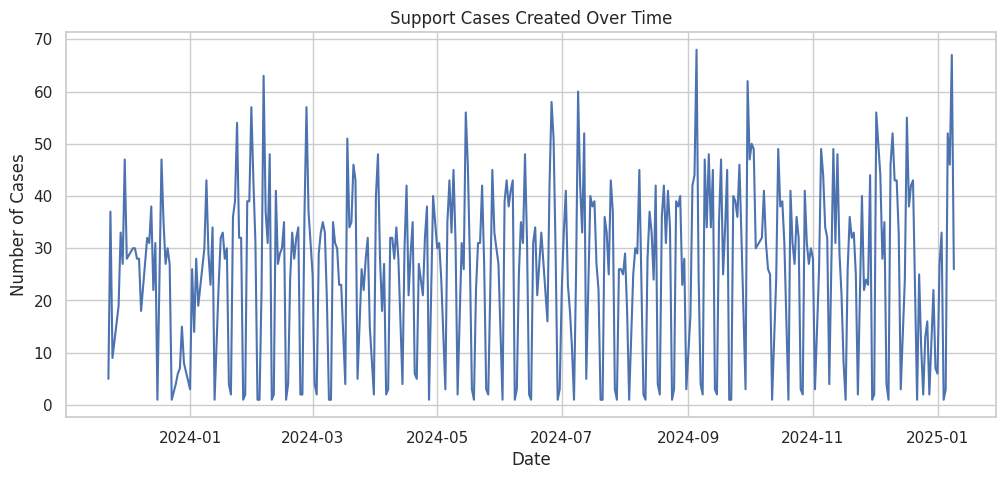

In [17]:
cases_over_time = cases_df.groupby(cases_df['case_created_date'].dt.date).size()

plt.figure(figsize=(12,5))
cases_over_time.plot()
plt.title("Support Cases Created Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

> ## 5. SQL Processing and KPI Aggregation

This section uses SQL (via SQLite) to join the datasets and compute key business metrics.  
The SQL environment allows us to perform relational operations, aggregations, and transformations that mirror real-world analytics workflows.

The main goals of this section include:
- Creating summary statistics using SQL
- Joining Accounts and Support Cases
- Generating KPIs such as number of cases per account, cases by product, status distributions, and industry-level metrics
- Preparing aggregated tables for later visualization

### 5.1 Creating SQLite In-Memory Database

In [18]:
import sqlite3

conn = sqlite3.connect(":memory:")

# Export Pandas DataFrames to SQL tables
accounts_df.to_sql("accounts", conn, index=False, if_exists="replace")
cases_df.to_sql("support_cases", conn, index=False, if_exists="replace")

print("SQLite in-memory database created and tables loaded successfully.")

SQLite in-memory database created and tables loaded successfully.


### 5.2 — Join Accounts and Cases

In [19]:
query_join = """
SELECT
    a.account_sfid,
    a.account_name,
    a.account_country,
    a.account_industry,
    c.case_sfid,
    c.case_status,
    c.case_severity,
    c.case_product,
    c.case_created_date,
    c.case_closed_date
FROM accounts a
LEFT JOIN support_cases c
    ON a.account_sfid = c.account_sfid;
"""

accounts_cases_joined = pd.read_sql_query(query_join, conn)
accounts_cases_joined.head()


,account_sfid,account_name,account_country,account_industry,case_sfid,case_status,case_severity,case_product,case_created_date,case_closed_date
0,28cb93e07db33a85d12c75825a11ab6a97c5a0df9750f6...,Customer_b9c711e0,Pakistan,Printing,64a543e70e3aaa89b06ac712938bf0d77d912efb6ebf74...,Closed,Medium,Print Inspection,2024-01-10 00:00:00,2024-03-21 00:00:00
1,17779701277914218bcfcd9211c3fb6673758ca2f6e014...,Customer_b3e69ecd,United Kingdom,Household & Personal Products,1bb262733051501e480fdf0942d67ef91a5029255d853a...,Closed,Medium,Print Inspection,2024-02-02 00:00:00,2024-03-27 00:00:00
2,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,China,Packaging and Containers,1f251a2db899f7052f00bb3115f68210bfe581dfdd41ff...,Closed,Medium,GVD,2024-02-21 00:00:00,2024-03-07 00:00:00
3,777c8f6154d9e1c1563ce0a62dbd8392ef3204cec6ecd1...,Customer_3b6e1b44,China,Packaging and Containers,4061144a58232461a337e75bb4e6f7b4c7c4cf79c8417b...,Closed,Medium,GVD,2024-02-29 00:00:00,2024-02-29 00:00:00
4,e7b6a33c931f01e1e2d42b47318945216da6fef294a738...,Customer_58de6751,South Korea,Pharmaceuticals,dd4017aec093fc75cf0b2a4ba9f200cee3258eed6d0891...,Closed,Medium,Print Inspection,2024-02-20 00:00:00,2024-02-22 00:00:00


### 5.3 — KPI: Cases Status Distribution

In [20]:
query_status = """
SELECT
    case_status,
    COUNT(*) AS total_cases
FROM support_cases
GROUP BY case_status
ORDER BY total_cases DESC;
"""

cases_by_status = pd.read_sql_query(query_status, conn)
cases_by_status

,case_status,total_cases
0,Closed,7043
1,Duplicate,2015
2,New,795
3,Waiting On Customer,45
4,Working,39
5,Sent_To_Dev,35
6,Waiting for 3rd Party,10
7,Remote Session Scheduled,9
8,Assigned,9


### 5.4 — KPI: Cases by Product

In [21]:
query_cases_by_product = """
SELECT
    case_product,
    COUNT(*) AS total_cases
FROM support_cases
GROUP BY case_product
ORDER BY total_cases DESC;
"""

cases_by_product = pd.read_sql_query(query_cases_by_product, conn)
cases_by_product

,case_product,total_cases
0,GVD,2850
1,Other,2573
2,Verify,1028
3,Not a Support Case,1024
4,GVW,825
...,...,...
67,Compliance Add-On,1
68,Color Print Inspection System,1
69,Color Inspection,1
70,Braille Inspection,1


### 5.5 — KPI: Cases by Industry (JOIN)

In [22]:
query_cases_by_industry = """
SELECT
    a.account_industry,
    COUNT(c.case_sfid) AS total_cases
FROM accounts a
LEFT JOIN support_cases c
    ON a.account_sfid = c.account_sfid
GROUP BY a.account_industry
ORDER BY total_cases DESC;
"""

cases_by_industry = pd.read_sql_query(query_cases_by_industry, conn)
cases_by_industry

,account_industry,total_cases
0,Pharmaceuticals,2393
1,Information Technology,1849
2,Printing,1154
3,Packaging and Containers,1072
4,Advertising & Branding Agency,475
5,Household & Personal Products,384
6,Other,308
7,Medical Devices,275
8,Food & Beverage,206
9,Chemicals,114


### 5.6 — KPI: Average Time to Close Cases

In [23]:
query_time_to_close = """
SELECT
    AVG(
        JULIANDAY(case_closed_date) - JULIANDAY(case_created_date)
    ) AS avg_days_to_close
FROM support_cases
WHERE case_closed_date IS NOT NULL;
"""

avg_time_to_close = pd.read_sql_query(query_time_to_close, conn)
avg_time_to_close

,avg_days_to_close
0,4.444911


### 5.7 — KPI: Cases Created per Day

In [24]:
query_cases_per_day = """
SELECT
    DATE(case_created_date) AS day,
    COUNT(*) AS total_cases
FROM support_cases
GROUP BY day
ORDER BY day;
"""

cases_per_day = pd.read_sql_query(query_cases_per_day, conn)
cases_per_day.head()

,day,total_cases
0,2023-11-22,5
1,2023-11-23,37
2,2023-11-24,9
3,2023-11-27,19
4,2023-11-28,33


> ## 6. Visualizations

### 6.1 Cases per Industry (Bar Chart)

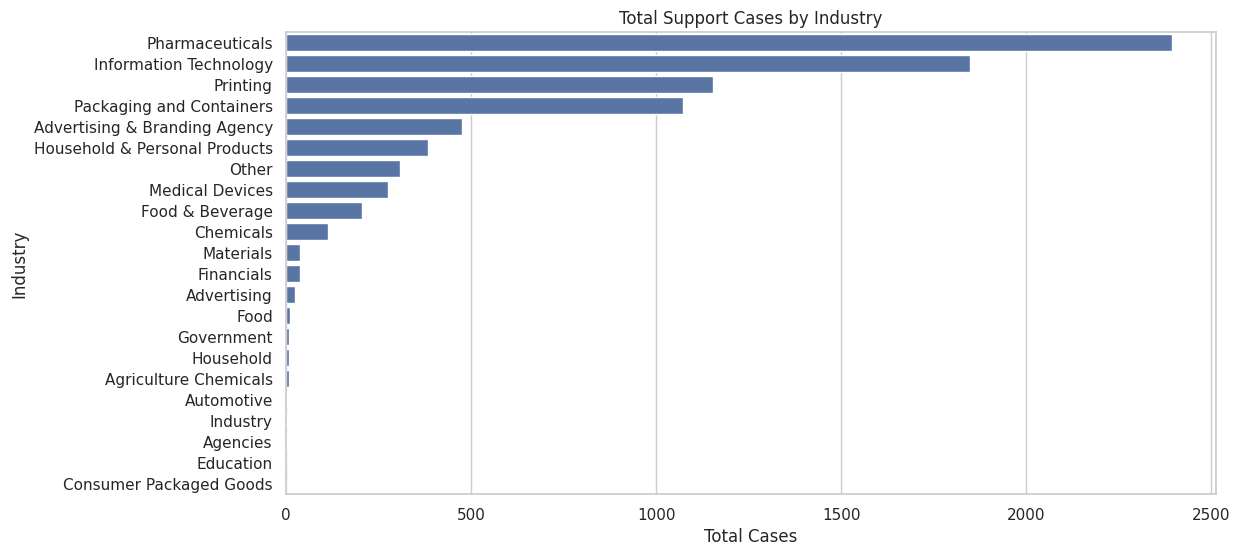

In [25]:
industry_cases = pd.read_sql("""
SELECT
    a.account_industry AS industry,
    COUNT(c.case_sfid) AS total_cases
FROM accounts a
LEFT JOIN support_cases c
    ON a.account_sfid = c.account_sfid
GROUP BY a.account_industry
ORDER BY total_cases DESC
""", conn)

plt.figure(figsize=(12,6))
sns.barplot(data=industry_cases, x="total_cases", y="industry")
plt.title("Total Support Cases by Industry")
plt.xlabel("Total Cases")
plt.ylabel("Industry")
plt.show()

### 6.2 Average Resolution Time (Horizontal Bar Chart)

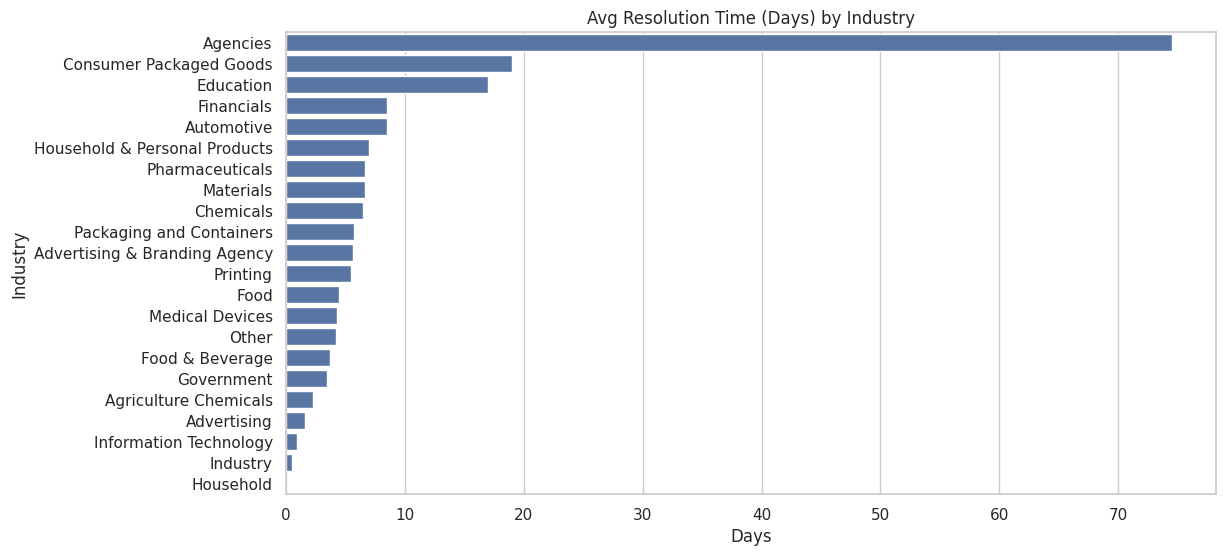

In [26]:
resolution = pd.read_sql("""
SELECT
    a.account_industry AS industry,
    AVG(julianday(c.case_closed_date) - julianday(c.case_created_date)) AS avg_days
FROM accounts a
JOIN support_cases c
    ON a.account_sfid = c.account_sfid
WHERE c.case_closed_date IS NOT NULL
GROUP BY a.account_industry
ORDER BY avg_days DESC;
""", conn)

plt.figure(figsize=(12,6))
sns.barplot(data=resolution, x="avg_days", y="industry")
plt.title("Avg Resolution Time (Days) by Industry")
plt.xlabel("Days")
plt.ylabel("Industry")
plt.show()

### 6.3 Case Status Distribution (Pie or Bar Chart)

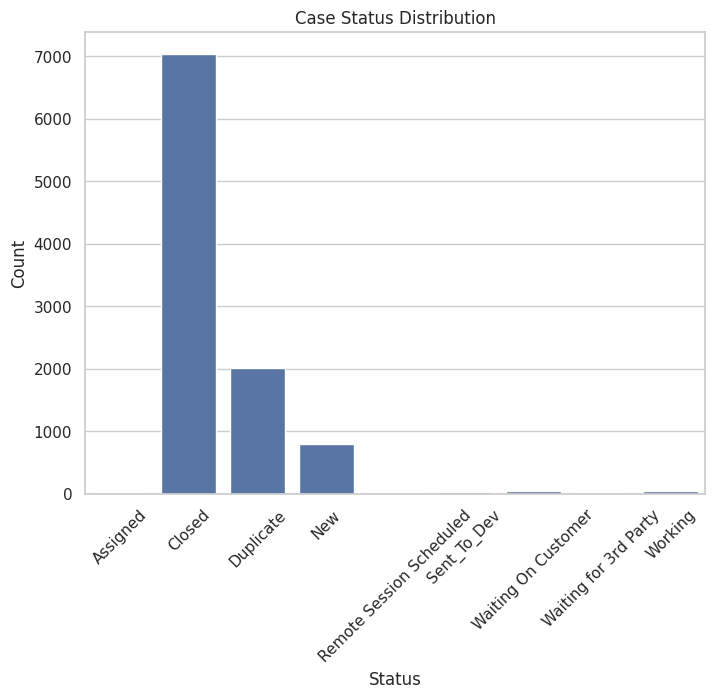

In [27]:
status = pd.read_sql("""
SELECT
    case_status,
    COUNT(*) AS total_cases
FROM support_cases
GROUP BY case_status
""", conn)

plt.figure(figsize=(8,6))
sns.barplot(data=status, x="case_status", y="total_cases")
plt.title("Case Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

> ## 7. Business Insights

Based on the SQL KPIs and exploratory analysis, several meaningful insights emerge:

### 1. Support Case Volume Concentration
A small portion of accounts generates most support cases.  
This suggests that a subset of customers may require additional onboarding, training, or product support to reduce ticket volume.

### 2. Case Status and Resolution Behavior
The distribution of case statuses reveals clear patterns in how cases flow through the support process.  
If a high share of cases remains open or unresolved, this may indicate bottlenecks in the support pipeline.

### 3. Product-Specific Case Trends
Some products generate significantly more cases than others.  
This points to potential usability issues or gaps in documentation affecting those product lines.

### 4. Industry-Level Support Demand
Industries differ in the number of cases submitted, suggesting certain verticals require more frequent assistance.  
This can inform targeted support resources or industry-focused improvements.

### 5. Time to Resolution
The average time to close cases provides a general indicator of support team efficiency.  
If resolution times are long, prioritization strategies or workflow adjustments may be needed.

Overall, the data highlights which customer segments, products, and operational areas deserve attention and where improvements can maximize support

1. Certain industries generate significantly higher case volume, indicating greater product adoption or support complexity.  
2. "Duplicate" and "Undefined" cases appear frequently, suggesting potential inefficiencies in ticket triage.  
3. A few products (e.g., GVD) drive most support demand, indicating areas for proactive documentation or training.  
4. Resolution times vary widely across industries, which may highlight differences in customer maturity or support workflow.


> ## 8. Recommendations

1. Improve support triage to reduce Duplicate cases, increasing team efficiency.  
2. Provide targeted training or documentation for high-volume products to reduce future ticket load.  


> ## 9. Conclusions

This analysis combined Python-based data exploration with SQL-driven processing to extract meaningful insights from Salesforce account and support case data.  
The workflow included cleaning and standardizing the datasets, computing key performance indicators through SQL queries, and interpreting patterns relevant to customer support operations.

Across the exploration, several themes emerged: support demand is unevenly distributed across accounts and industries; certain products drive more case activity; and resolution times highlight opportunities for operational improvement. These findings offer valuable direction for enhancing customer experience and optimizing support resources.

Overall, the project demonstrates a structured analytical approach, blending technical execution with business-oriented interpretation. The methodologies used here can be extended with additional metrics, dashboards, or predictive models to further support decision-making.

*This project demonstrates a complete workflow integrating Python, SQL, and visualization to derive actionable insights from Salesforce account and case data. The findings highlight key operational opportunities, particularly around triage efficiency and product-specific support patterns.*
